PHASE 0 - IMPORT DATASET

In [405]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

In [406]:
# Read the dataset
data = pd.read_csv('dataset.csv',nrows=100000)

PHASE 1 - PREPROCESSING

In [407]:
# Delete unecessary columns. These data are not helpful to our research
data.drop('ID', axis=1, inplace=True)
data.drop("Description", axis=1, inplace=True)
data.drop("Number", axis=1, inplace=True)
data.drop("Zipcode", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Airport_Code", axis=1, inplace=True)
data.drop("Weather_Timestamp", axis=1, inplace=True)
data.drop("Pressure(in)", axis=1, inplace=True)
data.drop("Wind_Direction", axis=1, inplace=True)
data.drop("Wind_Speed(mph)", axis=1, inplace=True)
data.drop("Precipitation(in)", axis=1, inplace=True)
data.drop("Amenity", axis=1, inplace=True)
data.drop("Bump", axis=1, inplace=True)
data.drop("Crossing", axis=1, inplace=True)
data.drop("Give_Way", axis=1, inplace=True)
data.drop("Junction", axis=1, inplace=True)
data.drop("No_Exit", axis=1, inplace=True)
data.drop("Railway", axis=1, inplace=True)
data.drop("Roundabout", axis=1, inplace=True)
data.drop("Station", axis=1, inplace=True)
data.drop("Stop", axis=1, inplace=True)
data.drop("Traffic_Calming", axis=1, inplace=True)
data.drop("Traffic_Signal", axis=1, inplace=True)
data.drop("Turning_Loop", axis=1, inplace=True)
data.drop("Start_Time", axis=1, inplace=True)
data.drop("End_Time", axis=1, inplace=True)
data.drop("Start_Lat", axis=1, inplace=True)
data.drop("Start_Lng", axis=1, inplace=True)
data.drop("End_Lat", axis=1, inplace=True)
data.drop("End_Lng", axis=1, inplace=True)
data.drop("Wind_Chill(F)", axis=1, inplace=True)
data.drop("Street", axis=1, inplace=True)
data.drop("City", axis=1, inplace=True)
data.drop("County", axis=1, inplace=True)

In [408]:
# Delete missing values
# Remove every row that has at least one missing value (NaN)
data.dropna(axis=0,inplace=True)

In [409]:
# Delete duplicate rows
data.drop_duplicates(inplace = True)

In [410]:
# Reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [411]:
# Select the last 4 columns from the dataset, so as to combine them in one column
last_4_columns  = data.iloc[: , -4:]

# Convert each record of these columns. Night == 0 and Day == 1
last_4_columns["Sunrise_Sunset"] = np.where(last_4_columns["Sunrise_Sunset"] == "Night", 0, 1)
last_4_columns["Civil_Twilight"] = np.where(last_4_columns["Civil_Twilight"] == "Night", 0, 1)
last_4_columns["Nautical_Twilight"] = np.where(last_4_columns["Nautical_Twilight"] == "Night", 0, 1)
last_4_columns["Astronomical_Twilight"] = np.where(last_4_columns["Astronomical_Twilight"] == "Night", 0, 1)

# Find the mean of each row of the last_4_columns dataframe
last_4_columns = last_4_columns.mean(axis=1)

# Convert the values of the last_4_rows dataframe into 0 and 1, based in a condition
# If the mean of a row is <0,5, then the value of this row will be 0, else it will be 1
for i in range (len(last_4_columns)):
    if last_4_columns[i] < 0.5:
        last_4_columns[i] = 0
    else:
        last_4_columns[i] = 1

In [412]:
# Convert R and L of column 'Side' to 0 and 1 respectively. That means that R is 0 and L is 1.
data["Side"] = np.where(data['Side'] == "R", 0, 1)

In [413]:
# Delete the last 4 columns of the dataset
# We do not need them, as we can combine them in a new column
data.drop('Sunrise_Sunset', axis=1, inplace=True)
data.drop('Civil_Twilight', axis=1, inplace=True)
data.drop('Nautical_Twilight', axis=1, inplace=True)
data.drop('Astronomical_Twilight', axis=1, inplace=True)

In [414]:
# Add a new column to the dataset.
# This new column will be the "last_4_columns" dataframe that we calculated earlier
data.insert(9,"Day_Night",last_4_columns)

In [415]:
# Converting 'Day_Night' column from float to int
data = data.astype({"Day_Night": int})

In [416]:
# Round all the values of "Temperature(F)" column
data["Temperature(F)"] = data["Temperature(F)"].round(0)

In [417]:
# Print dataset
data.head()

,Severity,Distance(mi),Side,State,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Day_Night
0,3,3.230,0,OH,US/Eastern,42.0,58.0,10.0,Light Rain,0
1,2,0.747,0,OH,US/Eastern,37.0,91.0,10.0,Light Rain,0
2,2,0.055,0,OH,US/Eastern,36.0,97.0,10.0,Overcast,0
3,2,0.123,0,OH,US/Eastern,39.0,55.0,10.0,Overcast,1
4,3,0.500,0,OH,US/Eastern,37.0,93.0,10.0,Light Rain,1


In [418]:
# Delete outliers from the dataset using the IQR method.
# We will focus only in columns: Temperature(F), Distance(mi), Visibility(mi) and Humidity(%)
for x in ["Temperature(F)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Distance(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Humidity(%)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Visibility(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr) - 5 # In order to keep values other than 10 (Ex. 5.5,6,7,8,9,10)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [419]:
# Delete rows that contain nulls (outliers)
data.dropna(axis=0,inplace=True)

In [420]:
# Reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [421]:
# Discretization of the column "Weather_Condition"

# We have separated all unique weather conditions of the dataset into four lists (very_bad_weatHer, bad_weather,medium_weather and perfect_weather).
# This separation has been done according to our opinion.

very_bad_weather = ['Tornado','Smoke','Snow Grains','Shallow Fog','Thunderstorm','Light Thunderstorms and Rain','Thunder','Thunder in the Vicinity','Thunderstorms and Rain',
'Heavy Rain','Fog','Blowing Snow','Mist','T-Storm','T-Storm / Windy','Volcanic Ash','Heavy Thunderstorms and Rain','Thunder / Windy','Heavy T-Storm / Windy','Heavy T-Storm',
'Heavy Drizzle','Sand / Dust Whirlwinds','Blowing Snow Nearby','Heavy Rain / Windy','Sand / Dust Whirls Nearby']

bad_weather = ['Patches of Fog','Haze','Light Snow','Squalls','Light Ice Pellets','Widespread Dust','Blowing Dust / Windy',
'Light Snow / Windy','Light Snow Showers','Wintry Mix','Light Rain with Thunder', 'Haze / Windy','Dust Whirls','Light Snow and Sleet','Snow',
'Light Snow and Sleet / Windy','Light Sleet','Patches of Fog / Windy','Low Drifting Snow','Squalls / Windy','Wintry Mix / Windy','Sleet']

medium_weather = ['Light Rain','Overcast','Mostly Cloudy', 'Cloudy','Scattered Clouds','Drizzle','Light Drizzle','Light Freezing Drizzle','Rain','Fair / Windy','Light Freezing Rain','Cloudy / Windy','Partly Cloudy / Windy',
'Light Rain Showers','Light Rain / Windy','Mostly Cloudy / Windy','Blowing Dust','Funnel Cloud','Light Rain Shower','Smoke / Windy','Light Rain Shower / Windy','Rain Shower','Sand / Dust Whirlwinds / Windy','Rain Showers',
'Light Drizzle / Windy','Showers in the Vicinity','Widespread Dust / Windy','Light Freezing Rain / Windy''N/A Precipitation','Rain / Windy',
'Light Sleet / Windy','Hail','Drizzle / Windy','Light Haze']

perfect_weather = ['Clear','Fair','Partly Cloudy','Small Hail']

# Change the values of the column "Weather_Condition" column
# Now, column "Weather_Condition" has only records: "Bad","Medium" and "Perfect"
for i in range(len(data["Weather_Condition"])):
    if data["Weather_Condition"][i] in bad_weather:
        data.at[i,"Weather_Condition"] = 2
    elif data["Weather_Condition"][i] in medium_weather:
        data.at[i,"Weather_Condition"] = 3  
    elif data["Weather_Condition"][i] in very_bad_weather:
         data.at[i,"Weather_Condition"] = 1
    else:
        data.at[i,"Weather_Condition"] = 4 # Perfect weather

In [422]:
# Convert data type of column 'Weather_Condition' to int
data = data.astype({"Weather_Condition": int})

In [423]:
# Convert 'State' column of the dataframe into numbers ()
 
# Instance of label Encoder
le = LabelEncoder()
 
# Encode column 'State' and return encoded label
label = le.fit_transform(data['State'])

# Insert a new column to the dataset
data.insert(4,"State_Number",label)

In [424]:
# Print dataset
data.head()

,Severity,Distance(mi),Side,State,State_Number,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Day_Night
0,2,0.747,0,OH,33,US/Eastern,37.0,91.0,10.0,3,0
1,2,0.055,0,OH,33,US/Eastern,36.0,97.0,10.0,3,0
2,2,0.123,0,OH,33,US/Eastern,39.0,55.0,10.0,3,1
3,3,0.500,0,OH,33,US/Eastern,37.0,93.0,10.0,3,1
4,2,1.427,0,OH,33,US/Eastern,36.0,100.0,10.0,3,1


In [425]:
# Print dimensions of dataset
print("Dimensions of dataset are: ",data.shape)

Dimensions of dataset are:  (76815, 11)


PHASE 2 - DATA VISUALIZATION

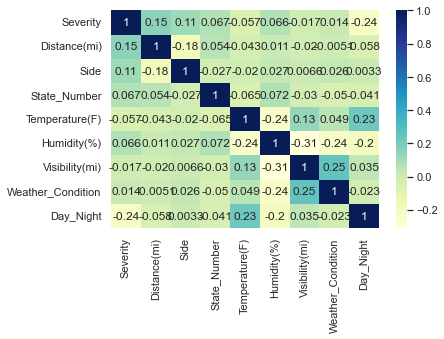

In [426]:
# Show the correlation of data using Heatmap
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Based in the plot above, we can conclude that no varriable is correlated among other varriables

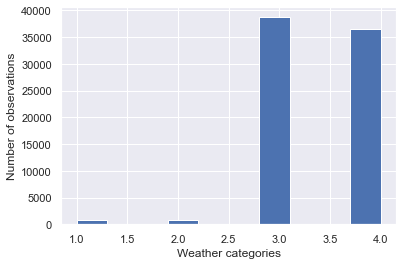

In [427]:
# Visualize 'Weather_Condition' column using histogram
plt.hist(data["Weather_Condition"])
plt.xlabel('Weather categories')
plt.ylabel('Number of observations')
plt.show()

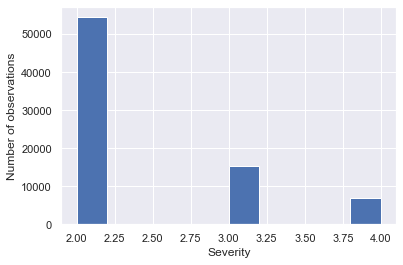

In [428]:
# Visualize 'Severity' column of using histogram
plt.hist(data["Severity"])
plt.xlabel('Severity')
plt.ylabel('Number of observations')
plt.show()

In [429]:
# Print States, in which the majority of accidents has happened
n_accidents_per_state = data['State'].value_counts().head(10).rename_axis('State').reset_index(name='Counts')
n_accidents_per_state

,State,Counts
0,CA,9600
1,TX,8546
2,FL,8545
3,IL,6260
4,NY,5059
5,NC,4082
6,NJ,3008
7,MO,2650
8,GA,2647
9,MI,2564


The state with the majority of accidents is: CA

PHASE 3 - DATA CLUSTERING

In [430]:
############################################################
# CLUSTER DATASET BASED ON Severity AND Weather Condition  #
############################################################

C1 = data[['Severity', 'Weather_Condition']].copy()

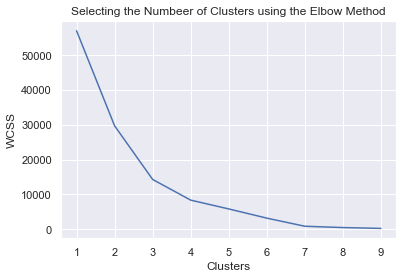

In [431]:
# Elbow method to find out the optimum K
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(C1)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 6), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

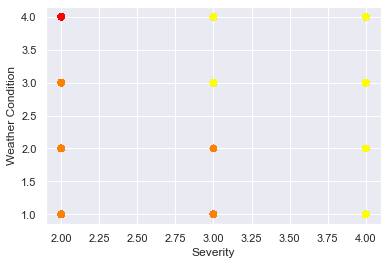

In [432]:
# K-means implementation and visualization of the effect
kmeans = KMeans(n_clusters=3)
Y1 = kmeans.fit_predict(C1)

plt.scatter(C1['Severity'], C1['Weather_Condition'],c=Y1,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('Weather Condition')
plt.show()

In [433]:
############################################################
# CLUSTER DATASET BASED ON Weather_Condition AND Distance  #
############################################################

C2 = data[['Weather_Condition', 'Distance(mi)']].copy()

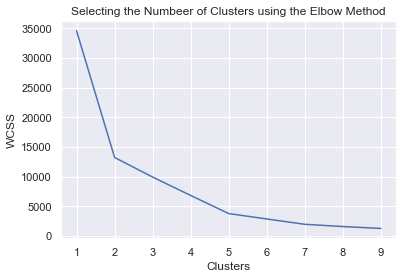

In [434]:
# Use elbow method to find out optimum K
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C2)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 6), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

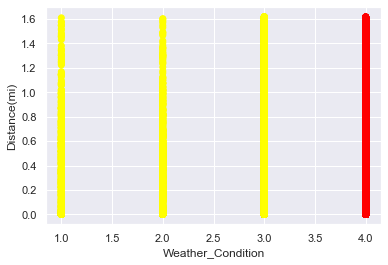

In [435]:
# Make the classification and visualize the output
kmeans = KMeans(n_clusters=2)
Y2 = kmeans.fit_predict(C2)

plt.scatter(C2['Weather_Condition'], C2['Distance(mi)'],c=Y2,cmap='autumn')
plt.xlabel('Weather_Condition')
plt.ylabel('Distance(mi)')
plt.show()

In [436]:
############################################################
# CLUSTER DATASET BASED ON Severity AND State              #
############################################################

C3 = data[['Severity', 'State_Number']].copy()

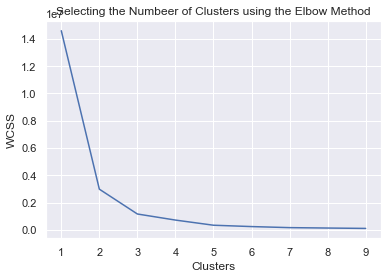

In [437]:
# Use Elbow method to find out optimum K
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C3)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 6), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

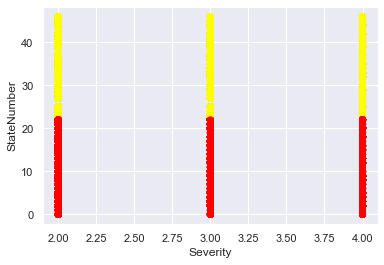

In [438]:
# Make classification and visualization of the output
kmeans = KMeans(n_clusters=2)
Y3 = kmeans.fit_predict(C3)

plt.scatter(C3['Severity'], C3['State_Number'],c=Y3,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('StateNumber')
plt.show()

In [439]:
############################################################
# CLUSTER DATASET BASED ON Day_Night AND Visibility(mi)    #
############################################################

C4 = data[['Day_Night', 'Visibility(mi)']].copy()

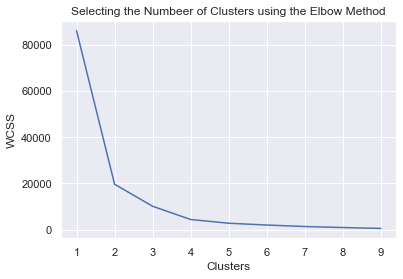

In [440]:
# Use Elbow method to find the optimum K
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C4)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 6), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

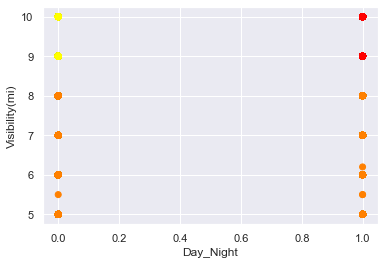

In [441]:
# Make classification and visualization
kmeans = KMeans(n_clusters=3)
Y4 = kmeans.fit_predict(C4)

plt.scatter(C4['Day_Night'], C4['Visibility(mi)'],c=Y4,cmap="autumn")
plt.xlabel('Day_Night')
plt.ylabel('Visibility(mi)')
plt.show()

In [442]:
############################################################
# CLUSTER DATASET BASED ON Side and Severity               #
############################################################

#  We will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
C5 = data[['Side', 'Severity']].copy()

C:\Users\strat\AppData\Local\Temp\ipykernel_4720\3681182610.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(C5)
C:\Users\strat\AppData\Local\Temp\ipykernel_4720\3681182610.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(C5)
C:\Users\strat\AppData\Local\Temp\ipykernel_4720\3681182610.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(C5)


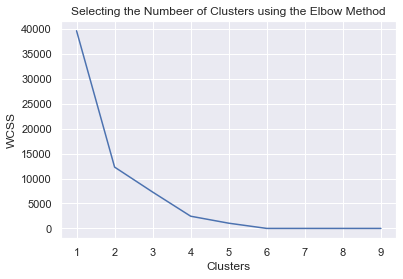

In [443]:
# Use Elbow method to find out optimum K
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C5)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 6), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

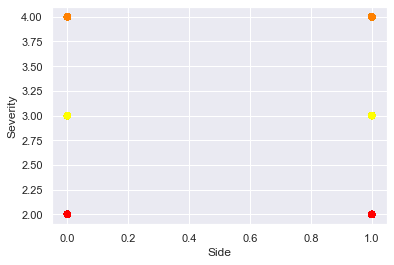

In [444]:
# Make classification and visualize the outcome
kmeans = KMeans(n_clusters=3)
Y5 = kmeans.fit_predict(C5)

plt.scatter(C5['Side'], C5['Severity'],c=Y5,cmap="autumn")
plt.xlabel('Side')
plt.ylabel('Severity')
plt.show()

PHASE 4 - DATA CLASSIFICATION

In [445]:
# Features: Weather_Condition, Visibility(mi), Day_Night
# Labels: Severity

# X is the <Features> matrix
X = data[['Weather_Condition', 'Visibility(mi)','Day_Night']].copy()
y = data['Severity'].copy()

In [446]:
# Split dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y,shuffle=True)

In [447]:
# Normalize the X_train and X_test, in order for them to be between [-1,1]  
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [448]:
# Print X_train set
X_train

array([[-0.78542456,  0.30856317,  0.44561451],
       [-0.78542456,  0.30856317, -2.24409209],
       [ 0.97405014,  0.30856317, -2.24409209],
       ...,
       [ 0.97405014,  0.30856317,  0.44561451],
       [ 0.97405014,  0.30856317,  0.44561451],
       [ 0.97405014,  0.30856317,  0.44561451]])

In [449]:
# Print X_test set
X_test

array([[ 0.97405014,  0.30856317,  0.44561451],
       [-0.78542456,  0.30856317, -2.24409209],
       [ 0.97405014,  0.30856317,  0.44561451],
       ...,
       [-0.78542456,  0.30856317,  0.44561451],
       [ 0.97405014,  0.30856317,  0.44561451],
       [ 0.97405014,  0.30856317,  0.44561451]])

First classifying method - Gaussian Classifier

In [450]:
# Use Bayes classifier in order to classify our Features and Labels
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict the test results
y_pred1  =  classifier.predict(X_test)

In [451]:
# Calculate the Confusion Matrix - Bayes Classifier
cm1 = confusion_matrix(y_test, y_pred1)

# Calculate accurancy score - Bayes Classifier
ac1 = accuracy_score(y_test,y_pred1)

# Calculate f1 score - Bayes Classifier
f1_bayes = f1_score(y_test,y_pred1,average='macro')

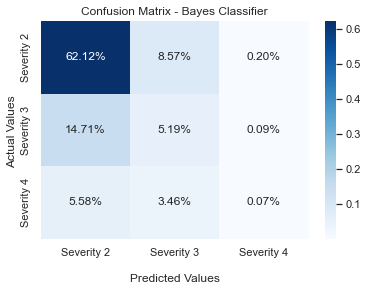

In [452]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Bayes Classifier')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [453]:
# Print accurancy score of Bayes Classifier
print("Accuracy score of Bayes Classifier is:",ac1)

Accuracy score of Bayes Classifier is: 0.6737616350973117


In [454]:
# Print F1 score of Bayes Classifier
print("F1 macro score of Bayes Classifier is:",f1_bayes)

F1 macro score of Bayes Classifier is: 0.3677308366508975


Second classifying method - Decision Tree Classifier

In [455]:
# Initialize classifier
dtc = DecisionTreeClassifier()

# Fit classifier
dtc.fit(X_train, y_train)

# Make the classification process
y_pred2 = dtc.predict(X_test)

In [456]:
# Calculate accurancy - Decision Tree Classifier
ac2 = metrics.accuracy_score(y_test, y_pred2)

# Calculate confusion matrix - Decision Tree Classifier
cm2 = confusion_matrix(y_test, y_pred2)

# Calculate f1 score - Bayes Classifier
f1_dt = f1_score(y_test,y_pred2,average='macro')

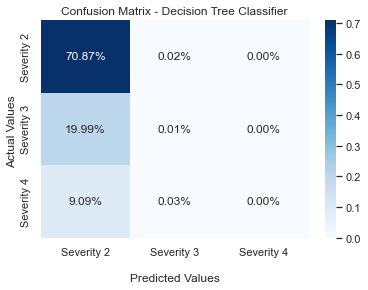

In [457]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Decision Tree Classifier')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [458]:
# Print accurancy score of Decision Tree Classifier
print("Accuracy score of Decision Tree classifier is:",ac2)

Accuracy score of Decision Tree classifier is: 0.708780837076092


In [459]:
# Print f1 score of Decision Tree Classifier
print("F1 macro score of Decision Tree Classifier is:",f1_dt)

F1 macro score of Decision Tree Classifier is: 0.27677922803656246


Third classifying method - Random Forest

In [460]:
# Initialize random forest classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(X_train,y_train)

# Predict values using Random Forest classifier
y_pred3=clf.predict(X_test)

In [461]:
# Calculate accurancy - Random Forest Classifier
ac3 = metrics.accuracy_score(y_test, y_pred3)

# Calculate confusion matrix - Random Forest Classifier
cm3 = confusion_matrix(y_test, y_pred3)

# Calculate F1 score - Random Forest Classifier
f1_rf = f1_score(y_test,y_pred3,average='macro')

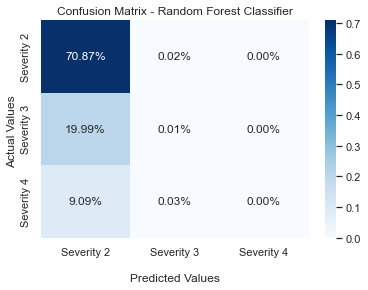

In [462]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm3/np.sum(cm3), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [463]:
# Print accurancy score of Random Forest Classifier
print("Accuracy score of Random Forest Classifier is:",ac3)

Accuracy score of Random Forest Classifier is: 0.708780837076092


In [464]:
# Print f1 score of Random Forest Classifier
print("F1 macro score of Random Forest Classifier is:",f1_rf)

F1 macro score of Random Forest Classifier is: 0.27677922803656246


PHASE 4 - MAKE A DATA STORY USING KERAS

In [467]:
# One - Hot encding the output varriable (label)
y_train = pd.get_dummies(y_train)
y_train = np.array(y_train)

y_test = pd.get_dummies(y_test)
y_test = np.array(y_test)

In [468]:
# Print y_train set
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [469]:
# Print y_test set
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [470]:
#################################
# Define the first keras model  #
#################################

# Make a sequential newral network with 3 inputs and 3 outputs
model1 = Sequential()
model1.add(Dense(6, input_dim = 3, activation = 'relu')) # Rectified Linear Unit Activation Function
model1.add(Dense(12, activation='relu'))
model1.add(Dense(4, activation='softmax')) # Softmax for multi-class classification

In [471]:
# Compile the first model
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [472]:
# Train the first model
model1.fit(X_train, y_train,epochs=20, batch_size=1000, verbose=1)

Epoch 1/15
615/615 [==============================] - 6s 5ms/step - loss: 0.8317 - accuracy: 0.6612
Epoch 2/15
615/615 [==============================] - 3s 5ms/step - loss: 0.7615 - accuracy: 0.7089
Epoch 3/15
615/615 [==============================] - 3s 5ms/step - loss: 0.7603 - accuracy: 0.7089
Epoch 4/15
615/615 [==============================] - 4s 7ms/step - loss: 0.7599 - accuracy: 0.7089
Epoch 5/15
615/615 [==============================] - 3s 5ms/step - loss: 0.7598 - accuracy: 0.7089
Epoch 6/15
615/615 [==============================] - 4s 6ms/step - loss: 0.7595 - accuracy: 0.7089
Epoch 7/15
615/615 [==============================] - 4s 7ms/step - loss: 0.7594 - accuracy: 0.7089
Epoch 8/15
615/615 [==============================] - 4s 7ms/step - loss: 0.7594 - accuracy: 0.7089
Epoch 9/15
615/615 [==============================] - 4s 6ms/step - loss: 0.7593 - accuracy: 0.7089
Epoch 10/15
615/615 [==============================] - 4s 6ms/step - loss: 0.7593 - accuracy: 0.7089

In [473]:
# Now test the X_test set
predicted_y1 = model1.predict(X_test)

481/481 [==============================] - 3s 5ms/step


In [474]:
# Evaluate the model
score = model1.evaluate(X_test,y_test,verbose=0)
print('Loss score is: ',score[0], 'and accuracy score is:',score[1])

Loss score is:  0.7588987946510315 and accuracy score is: 0.7089110016822815


In [475]:
# Calculate confusion matrix - Model 1
cm4 = confusion_matrix(y_test.argmax(axis=1), predicted_y1.argmax(axis=1))

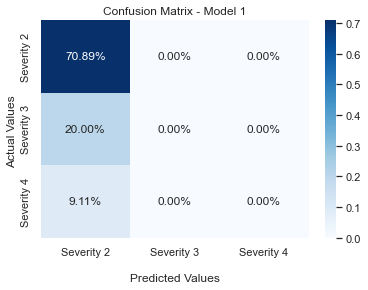

In [476]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm4/np.sum(cm4), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Model 1')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [477]:
##################################
# Define the second keras model  #
##################################

# Make a sequential newral network with 3 inputs and 3 outputs
model2 = Sequential()
model2.add(Dense(6, input_dim = 3, activation = 'relu')) # Rectified Linear Unit Activation Function
model2.add(Dense(12, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(4, activation='softmax')) # Softmax for multi-class classification

In [478]:
# Compile the second model
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [479]:
# Train the second model
model2.fit(X_train, y_train,epochs=20, batch_size=1000, verbose=1)

Epoch 1/30
62/62 [==============================] - 3s 8ms/step - loss: 0.9658 - accuracy: 0.6115
Epoch 2/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7925 - accuracy: 0.7089
Epoch 3/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7678 - accuracy: 0.7089
Epoch 4/30
62/62 [==============================] - 0s 8ms/step - loss: 0.7634 - accuracy: 0.7087
Epoch 5/30
62/62 [==============================] - 1s 12ms/step - loss: 0.7621 - accuracy: 0.7088
Epoch 6/30
62/62 [==============================] - 1s 9ms/step - loss: 0.7614 - accuracy: 0.7087
Epoch 7/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7609 - accuracy: 0.7087
Epoch 8/30
62/62 [==============================] - 1s 9ms/step - loss: 0.7605 - accuracy: 0.7088
Epoch 9/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7602 - accuracy: 0.7087
Epoch 10/30
62/62 [==============================] - 1s 8ms/step - loss: 0.7600 - accuracy: 0.7089
Epoch 11/30
62/62 

In [480]:
# Now test the model2
predicted_y2 = model2.predict(X_test)

481/481 [==============================] - 3s 5ms/step


In [481]:
# Calculate confusion matrix - Model 2
cm5 = confusion_matrix(y_test.argmax(axis=1), predicted_y2.argmax(axis=1))

In [482]:
# Evaluate the model 2
score = model2.evaluate(X_test,y_test,verbose=0)
print('Loss score is: ',score[0], 'and accuracy score is:',score[1])

Loss score is:  0.75870680809021 and accuracy score is: 0.7089110016822815


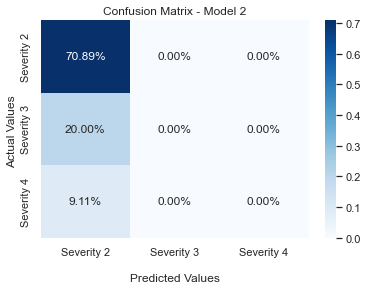

In [483]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm5/np.sum(cm5), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Model 2')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [484]:
##################################
# Define the third keras model   #
##################################

# Make a sequential newral network with 3 inputs and 3 outputs
model3 = Sequential()
model3.add(Dense(6, input_dim = 3, activation = 'relu')) # Rectified Linear Unit Activation Function
model3.add(Dense(12, activation='relu'))
model3.add(Dense(24, activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(4, activation='softmax')) # Softmax for multi-class classification

In [485]:
# Compile the second model
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [486]:
# Train the first model
model3.fit(X_train, y_train,epochs=20, batch_size=1000, verbose=1)

Epoch 1/30
62/62 [==============================] - 4s 9ms/step - loss: 0.9421 - accuracy: 0.7086
Epoch 2/30
62/62 [==============================] - 0s 8ms/step - loss: 0.7795 - accuracy: 0.7089
Epoch 3/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7635 - accuracy: 0.7089
Epoch 4/30
62/62 [==============================] - 1s 9ms/step - loss: 0.7608 - accuracy: 0.7089
Epoch 5/30
62/62 [==============================] - 0s 8ms/step - loss: 0.7603 - accuracy: 0.7089
Epoch 6/30
62/62 [==============================] - 0s 8ms/step - loss: 0.7601 - accuracy: 0.7089
Epoch 7/30
62/62 [==============================] - 1s 10ms/step - loss: 0.7599 - accuracy: 0.7089
Epoch 8/30
62/62 [==============================] - 1s 9ms/step - loss: 0.7597 - accuracy: 0.7089
Epoch 9/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7596 - accuracy: 0.7089
Epoch 10/30
62/62 [==============================] - 0s 7ms/step - loss: 0.7596 - accuracy: 0.7089
Epoch 11/30
62/62 

In [487]:
# Now test model3
predicted_y3 = model3.predict(X_test)

481/481 [==============================] - 2s 4ms/step


In [488]:
# Calculate confusion matrix - Model 3
cm6 = confusion_matrix(y_test.argmax(axis=1), predicted_y3.argmax(axis=1))

In [489]:
# Evaluate the model
score = model3.evaluate(X_test,y_test,verbose=0)
print('Loss score is: ',score[0], 'and accuracy score is:',score[1])

Loss score is:  0.7587133646011353 and accuracy score is: 0.7089110016822815


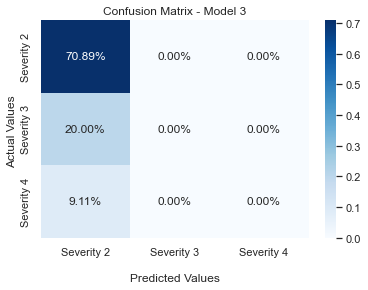

In [490]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm6/np.sum(cm6), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Model 3')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

# Display the visualization of the Confusion Matrix.
plt.show()

PHASE 5 - CONCLUSIONS (DATA STORY) BASED IN MODEL ?

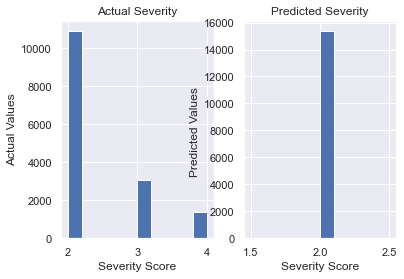

In [491]:
# Plot (using histograms) the actual (y_test) and predicted values (y_predicted) of output varriable (Severity), 
# so as to make a comparison

predicted_severity = []
for list in predicted_y1:
    if list[0]>list[1] and list[0]>list[2] and list[0]>list[3]:
        predicted_severity.append(2)
    elif list[1]>list[0] and list[1]>list[2] and list[1]>list[3]:
        predicted_severity.append(3)
    elif list[2]>list[0] and list[2]>list[1] and list[2]>list[3]:
        predicted_severity.append(4)
    else:
        predicted_severity.append(1)

actual = []
for item in y_test:
    if item[0] == 1:
        actual.append(2)
    elif item[1] == 1:
        actual.append(3)
    elif item[2] == 1:
        actual.append(4)
    else:
        actual.append(1)

prediction = pd.DataFrame(predicted_severity,columns=['Severity_Predictions'])
actual = pd.DataFrame(actual,columns=['Actual_Severity'])

# plot actual over predicted values in one figure
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(actual)
plt.title("Actual Severity")
plt.xlabel('Severity Score')
plt.ylabel('Actual Values')

plt.subplot(1, 2, 2) # index 2
plt.hist(prediction)
plt.title("Predicted Severity")
plt.xlabel('Severity Score')
plt.ylabel('Predicted Values ')

plt.show()
